In [ ]:
# Importing the libraries we need for the weekly data analysis project.

import requests

import pandas as pd

import numpy as np

import plotly.express as px

import matplotlib.pyplot as plt

print('Libraries imported')

Libraries imported


In [ ]:
# Below, we perform an API call to retrieve the database in the url described below.

import io
import requests
import zipfile
import pandas as pd
url = 'https://www150.statcan.gc.ca/n1/tbl/csv/18100210-eng.zip'
r = requests.get(url)
with zipfile.ZipFile(io.BytesIO(r.content)) as datazip:
    housingDF = datazip.read('18100210.csv')
housingDF = pd.read_csv(io.StringIO(housingDF.decode()))
housingDF.head()


,REF_DATE,GEO,DGUID,Base year,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2017,Canada,2016A000011124,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068508,1.5.1,100.00,NaN,NaN,NaN,2
1,2017,"St. John's, Newfoundland and Labrador",2011S0503001,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068509,2.5.1,1.16,NaN,NaN,NaN,2
2,2017,"Charlottetown, Prince Edward Island",2011S0504105,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068510,3.5.1,0.15,NaN,NaN,NaN,2
3,2017,"Halifax, Nova Scotia",2011S0503205,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068511,4.5.1,0.72,NaN,NaN,NaN,2
4,2017,"Saint John, Fredericton and Moncton, New Bruns...",2011S0503310,"Index, 201612=100","Total, house and land","Index, 201612=100",347,units,0,v112068512,5.5.1,1.02,NaN,NaN,NaN,2


Here is an example of how to get the data using API and visualize it.


In [ ]:
#Construt a dataframe just for these three variables (useful only)
#delete 'Canada' rows since they are all 100 and meaningless
housing1=pd.DataFrame(housingDF,columns=['REF_DATE', 'GEO', 'VALUE'] )
housing1=housing1[~housing1.GEO.str.contains("Canada")]
housing1.head()

,REF_DATE,GEO,VALUE
1,2017,"St. John's, Newfoundland and Labrador",1.16
2,2017,"Charlottetown, Prince Edward Island",0.15
3,2017,"Halifax, Nova Scotia",0.72
4,2017,"Saint John, Fredericton and Moncton, New Bruns...",1.02
5,2017,"Québec, Quebec",1.45


In [ ]:
housing1.shape
# There are 108 rows and 3 columns in the housing1 data frame.

(108, 3)

In [ ]:
#There are some possible chart for exploring the data
#1. distribution of value for each year
#2. year vs GEO vs changing rate of value [Emily wants to try this :) Stay tuned!]
#3. show in a map
#4. statistical modeling (may not possible)

In [ ]:
group = housing1.groupby('REF_DATE')
group.mean()
group.describe()

VALUE                                                     
         count      mean       std   min    25%   50%    75%    max
REF_DATE                                                           
2017      27.0  3.704074  5.659261  0.15  0.900  1.54  2.790  25.49
2018      27.0  3.704815  5.899734  0.18  0.790  1.68  2.700  27.91
2019      27.0  3.702963  5.999719  0.18  0.705  1.63  2.865  29.06
2020      27.0  3.703333  7.046465  0.09  0.480  1.37  2.190  29.10

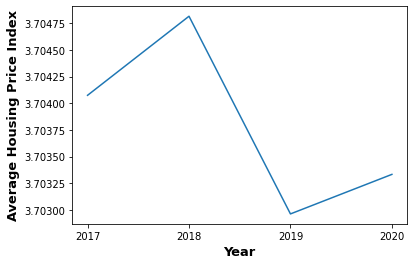

In [ ]:
# line graph of year and value
import matplotlib.pyplot as plt
plt.plot(housing1.REF_DATE.unique(), group.mean())
plt.xlabel("Year",fontsize=13,fontweight='bold')
plt.ylabel("Average Housing Price Index",fontsize=13,fontweight='bold')
my_x_ticks = np.arange(2017, 2021, 1)
plt.xticks(my_x_ticks)
plt.show()
# It shows the average value changes through years. Specifically,
# the following graph plots the average Housing Price Index across
# all municipalities in Canada for the years 2017, 2018, 2019,
# and 2020. There are only four data points on this graph,
# lines are drawn between the data points for aesthetic reasons.

Text(0.5, 0, 'Municipality in Canada')

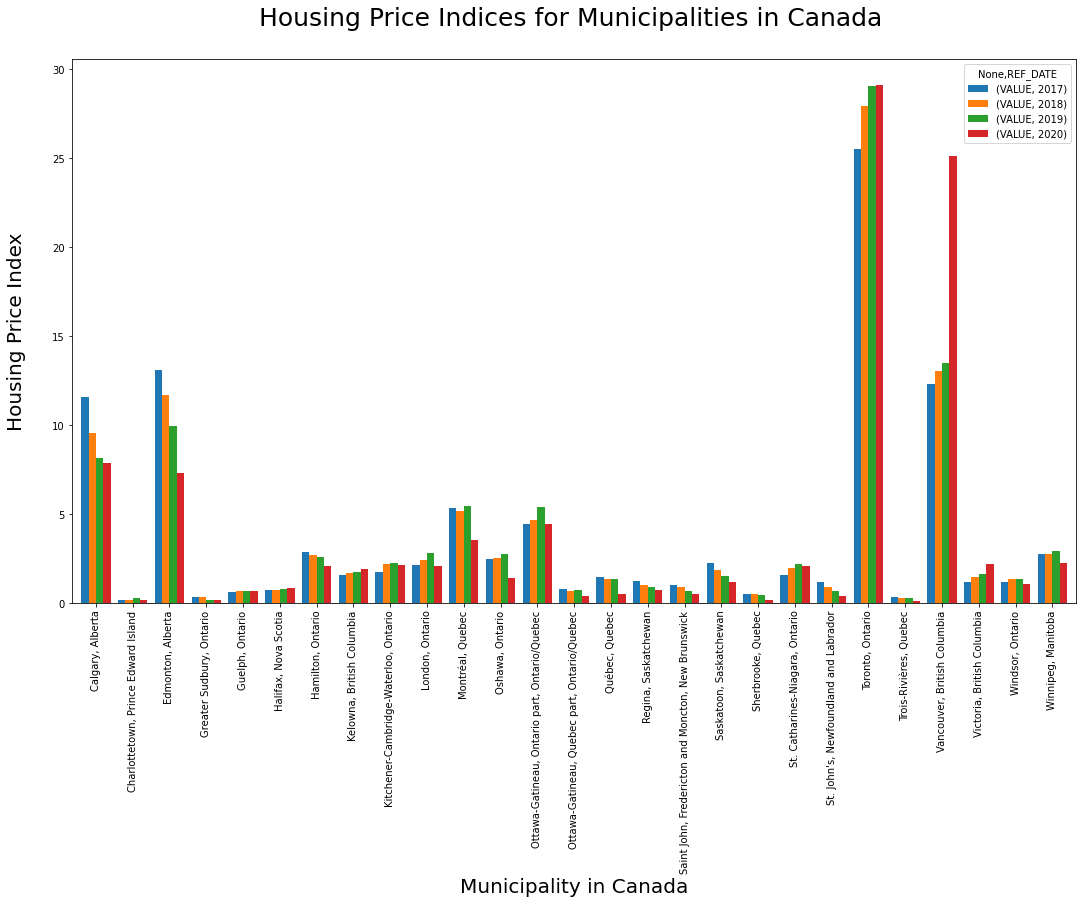

In [ ]:
# This bar chart evaluates the Housing Price Index for all of the locations
# in Canada listed below, where the Housing Price Indices are colour coded
# by year. The years are 2017 - 2020.

# In the following code, we construct the bars by determining their
# corresponding entries in the 'VALUE' column of the housing1 data frame.
# The width  parameter for the bars is set at 0.8, and the width and 
# height dimensions for displaying the figure is determined by the parameters 
# (18, 10).

# Legend for the bar chart:

# The label 'GEO' on the horizontal axis represents location.

# The vertical axis represents the Housing Price Index and the numbers on the
# vertical axis are percentages.

# Blue (VALUE, 2017) represents the Housing Price Index in 2017. Orange,
# green, and red represent similar quantities for the years 2018, 2019, and
# 2020 respectively.

housing1.groupby(['GEO','REF_DATE'],sort=True).sum()[['VALUE']].unstack().plot(kind="bar",width = 0.8,figsize=(18,10))

plt.title('Housing Price Indices for Municipalities in Canada \n', fontsize = 25)
plt.ylabel('Housing Price Index\n', fontsize = 20)
plt.xlabel('Municipality in Canada', fontsize = 20)

# [['']] means we return the col (type= dataframe)



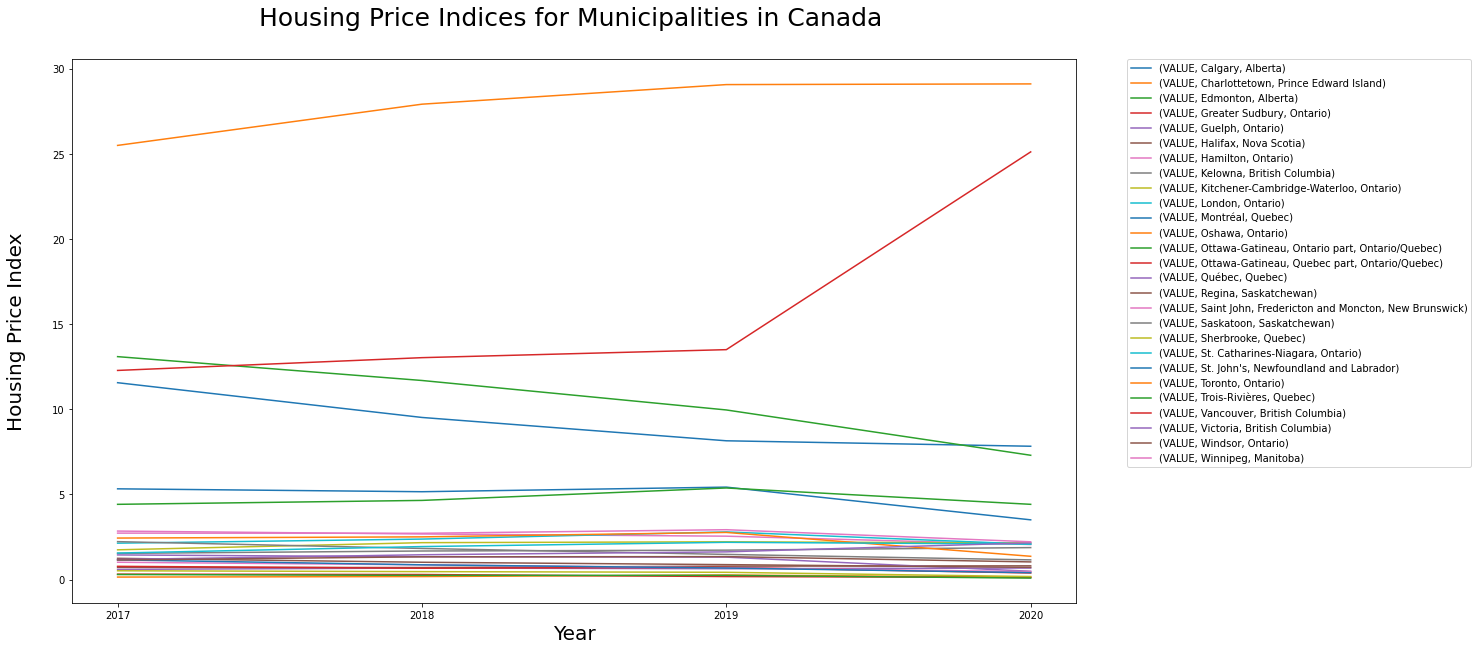

In [ ]:
# This line chart evaluates the Housing Price Index for all of the locations
# in Canada listed below, where the Housing Price Indices are colour coded
# by year. The years are 2017 - 2020.

# In the following code, we construct the lines by determining their
# corresponding entries in the 'VALUE' column of the housing1 data frame. 
# Height dimensions for displaying the figure is determined by the parameters 
# (18, 10).

# Legend for the bar chart: Each line represents one location.

# We can see the changes of housing price index of some top cities for years  
# more clearly through the line chart

housing1.groupby(['REF_DATE','GEO'],sort=True).sum()[['VALUE']].unstack().plot(kind="line",figsize=(18,10))

plt.title('Housing Price Indices for Municipalities in Canada \n', fontsize = 25)
plt.ylabel('Housing Price Index\n', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
my_x_ticks = np.arange(2017, 2021, 1)
plt.xticks(my_x_ticks)

plt.legend(loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)

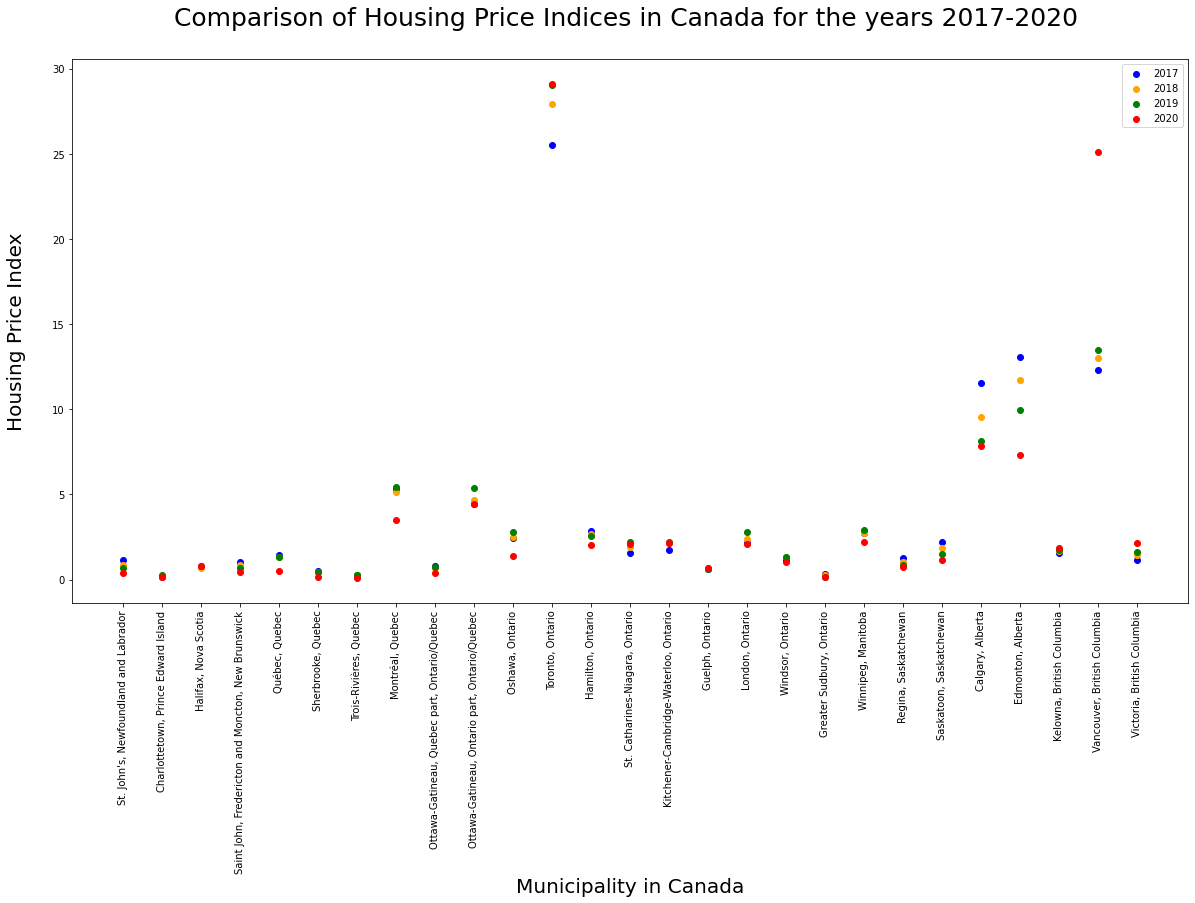

In [ ]:
# The following scatterplot evaluates the Housing Price Index for the municipalities
# in Canada during the years 2017, 2018, 2019, and 2020. The years are colour-
# coded as blue, yellow, green, and red (see legend).

Value_2017=housing1['VALUE'][0:27]
Value_2018=housing1['VALUE'][27:54]
Value_2019=housing1['VALUE'][54:81]
Value_2020=housing1['VALUE'][81:111]

# Second, we put all the locations in a pandas.DataFrame called 'Geography'.
Geography=housing1['GEO'][0:27]

# Now, we construct the scatterplot using the above series as data.

import matplotlib.pyplot as plt
plt.scatter(Geography,Value_2017,color='blue',label='2017')
plt.scatter(Geography,Value_2018,color='orange',label='2018')
plt.scatter(Geography,Value_2019,color='green',label='2019')
plt.scatter(Geography,Value_2020,color='red',label='2020')
plt.title('Comparison of Housing Price Indices in Canada for the years 2017-2020 \n', fontsize = 25)
plt.ylabel('Housing Price Index\n', fontsize = 20)
plt.xlabel('Municipality in Canada', fontsize = 20)
plt.xticks(rotation = 90) # this command makes the name of all locations be put in vertical line.
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10] 
plt.show()

Mean, median, and standard deviation for all HPI's
mean is 3.7037962962962987
median is 1.55
standard deviation is 6.087038737648301
 
Mean, median, and standard deviation for all HPI's of 2017
mean is 3.7040740740740747
median is 1.54
standard deviation is 5.65926147618578
 
Mean, median, and standard deviation for all HPI's of 2018
mean is 3.697777777777778
median is 1.54
standard deviation is 5.65926147618578
 
Mean, median, and standard deviation for all HPI's of 2019
mean is 3.6881481481481484
median is 1.54
standard deviation is 5.65926147618578
 
Mean, median, and standard deviation for all HPI's of 2020
mean is 4.109583333333332
median is 1.54
standard deviation is 5.65926147618578
 


Text(0, 0.5, 'Housing Price Index')

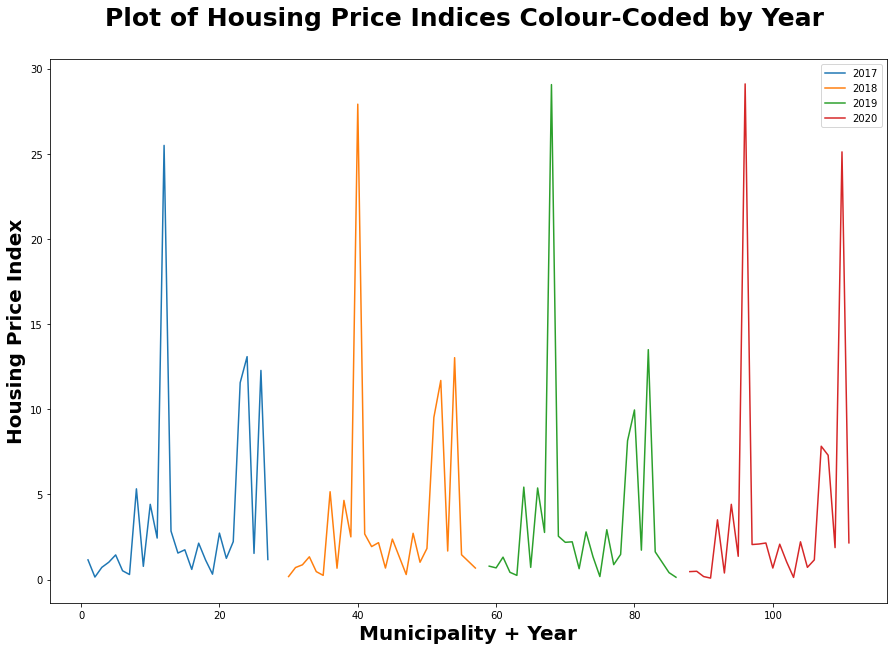

In [ ]:



Value_2017=housing1['VALUE'][0:27]
Value_2018=housing1['VALUE'][27:54]
Value_2019=housing1['VALUE'][54:81]
Value_2020=housing1['VALUE'][81:111]
Geography=housing1['GEO'][0:27]

# mean, median, and standard deviation for all HPI's (abbreviation for Housing Price Index).

print('Mean, median, and standard deviation for all HPI\'s')
housing_mean = housing1['VALUE'].mean()
print('mean is ' + str(housing_mean))
housing_median = housing1['VALUE'].median()
print('median is ' + str(housing_median))
housing_std = housing1['VALUE'].std()
print('standard deviation is ' + str(housing_std))
print(' ')

# mean, median, and standard deviation for HPI's of 2017.

for i in range(4):

    print('Mean, median, and standard deviation for all HPI\'s of ' + str(2017 + i))
    housing_mean = housing1['VALUE'][28*i:28*(i+1)-1].mean()
    print('mean is ' + str(housing_mean))
    housing_median = housing1['VALUE'][0:27].median()
    print('median is ' + str(housing_median))
    housing_std = housing1['VALUE'][0:27].std()
    print('standard deviation is ' + str(housing_std))
    print(' ')


# The following graph plots the Housing Price Indices (HPI's) recorded from the above 
# data set. The horizontal axis represents the both the municipality in Canada
# the HPI was taken from and the year in which the entry was recorded.
# The horizontal axis is divided into four years, and in each of those years
# the horizontal axis is sub-divided into the municipalities in Canada that
# were measured during that year. Moreover, the graph is colour-coded by year. 
# Specifically, the  data coloured blue represents data collected in 2017, the data coloured orange 
# represents data collected in 2018, the data coloured green represents data collected in
# 2018, and the data coloured red represents data collected in 2020.

for i in range(4):
    housing1['VALUE'][28*i:28*(i+1)-1].plot(figsize = (15,10), label = str(2017 + i))

plt.legend()
plt.title('Plot of Housing Price Indices Colour-Coded by Year \n', fontsize = 25, fontweight='bold')
plt.xlabel("Municipality + Year",fontsize=20,fontweight='bold')
plt.ylabel("Housing Price Index",fontsize=20,fontweight='bold')


# Calculation of Percent Changes

In [ ]:
# This DataFrame, called percent_changes, contains the percent changes (%) in the Housing Price Index, for each 
# geographical region (GEO).
# Included comparisons: 2017/2018, 2017/2019, 2017/2020, 2018/2019, 2018/2020, and 2019/2020

# Separate the data by each year (REF_DATE)
housing1_2017 = housing1[housing1.REF_DATE==2017]
housing1_2018 = housing1[housing1.REF_DATE==2018]
housing1_2019 = housing1[housing1.REF_DATE==2019]
housing1_2020 = housing1[housing1.REF_DATE==2020]

# Fix the indexing
housing1_2018.index = housing1_2017.index
housing1_2019.index = housing1_2017.index
housing1_2020.index = housing1_2017.index

# Combine into one DataFrame 
percent_changes = pd.DataFrame(housing1[housing1.REF_DATE==2017].GEO)
percent_changes['2017'] = pd.Series(housing1_2017.VALUE)
percent_changes['2018'] = pd.Series(housing1_2018.VALUE)
percent_changes['2019'] = pd.Series(housing1_2019.VALUE)
percent_changes['2020'] = pd.Series(housing1_2020.VALUE)

# Calculate the percent changes 
# Percent change 'A/B' is calculated as 100*(B-A)/A
percent_changes['2017/2018'] = pd.Series(100*(percent_changes['2018'] - percent_changes['2017'])/percent_changes['2017'])
percent_changes['2017/2019'] = pd.Series(100*(percent_changes['2019'] - percent_changes['2017'])/percent_changes['2017'])
percent_changes['2017/2020'] = pd.Series(100*(percent_changes['2020'] - percent_changes['2017'])/percent_changes['2017'])
percent_changes['2018/2019'] = pd.Series(100*(percent_changes['2019'] - percent_changes['2018'])/percent_changes['2018'])
percent_changes['2018/2020'] = pd.Series(100*(percent_changes['2020'] - percent_changes['2018'])/percent_changes['2018'])
percent_changes['2019/2020'] = pd.Series(100*(percent_changes['2020'] - percent_changes['2019'])/percent_changes['2019'])

# Remove redundant columns: 2017, 2018, 2019, and 2020 data are already in the housing1 DataFrame.
del percent_changes['2017']
del percent_changes['2018']
del percent_changes['2019']
del percent_changes['2020']

# Display the wide format data
display(percent_changes.round(decimals=2))

# Reshape the data from wide format into long format, because long format is easier to work with
percent_changes = percent_changes.melt(id_vars=['GEO'])
percent_changes.columns = ['GEO', 'CHANGE', 'VALUE']

,GEO,2017/2018,2017/2019,2017/2020,2018/2019,2018/2020,2019/2020
1,"St. John's, Newfoundland and Labrador",-25.00,-41.38,-64.66,-21.84,-52.87,-39.71
2,"Charlottetown, Prince Edward Island",20.00,80.00,-6.67,50.00,-22.22,-48.15
3,"Halifax, Nova Scotia",-1.39,9.72,12.50,11.27,14.08,2.53
4,"Saint John, Fredericton and Moncton, New Bruns...",-14.71,-32.35,-53.92,-20.69,-45.98,-31.88
5,"Québec, Quebec",-7.59,-8.97,-66.21,-1.49,-63.43,-62.88
6,"Sherbrooke, Quebec",-9.62,-17.31,-65.38,-8.51,-61.70,-58.14
7,"Trois-Rivières, Quebec",-16.67,-16.67,-70.00,0.00,-64.00,-64.00
8,"Montréal, Quebec",-3.19,1.88,-34.15,5.23,-31.98,-35.36
9,"Ottawa-Gatineau, Quebec part, Ontario/Quebec",-14.10,-7.69,-50.00,7.46,-41.79,-45.83
10,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",5.20,21.72,0.00,15.70,-4.95,-17.84


Reshaped percent changes data:

In [ ]:
percent_changes

,GEO,CHANGE,VALUE
0,"St. John's, Newfoundland and Labrador",2017/2018,-25.000000
1,"Charlottetown, Prince Edward Island",2017/2018,20.000000
2,"Halifax, Nova Scotia",2017/2018,-1.388889
3,"Saint John, Fredericton and Moncton, New Bruns...",2017/2018,-14.705882
4,"Québec, Quebec",2017/2018,-7.586207
...,...,...,...
157,"Calgary, Alberta",2019/2020,-3.926380
158,"Edmonton, Alberta",2019/2020,-26.706827
159,"Kelowna, British Columbia",2019/2020,8.670520
160,"Vancouver, British Columbia",2019/2020,86.000000


Here's a visualization:

Text(0.5, 0, 'Municipality in Canada')

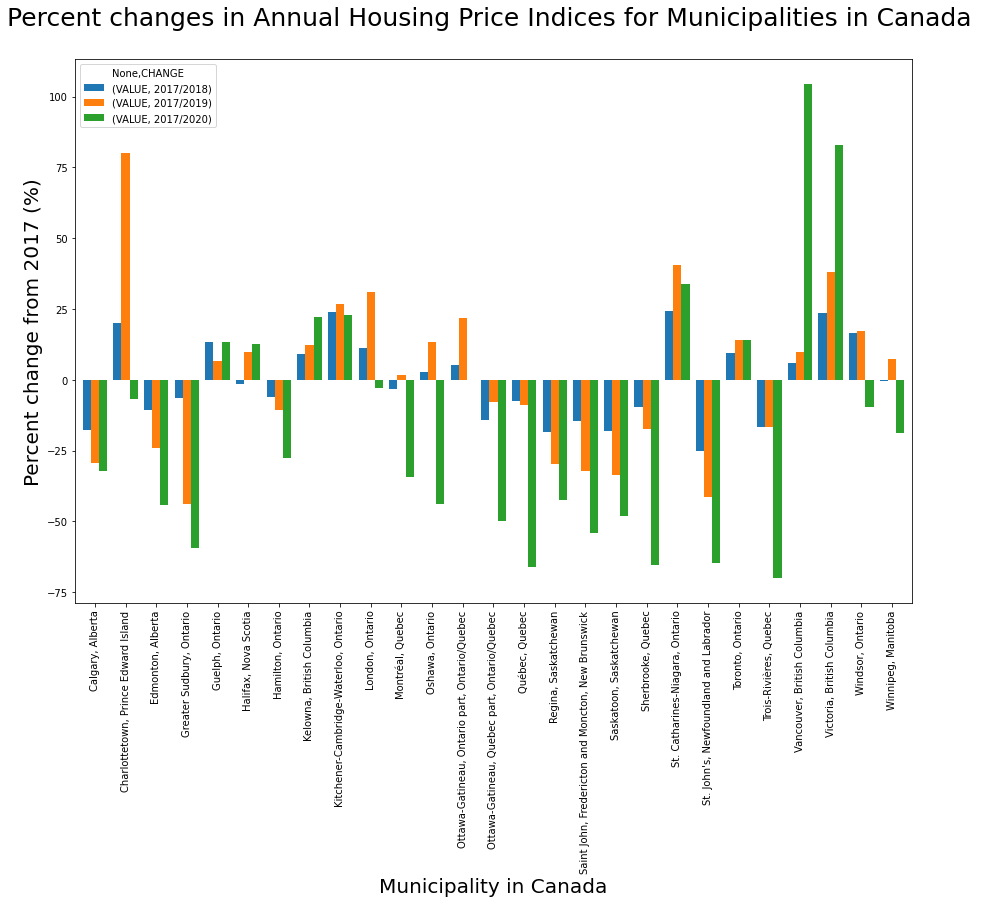

In [ ]:
# This bar chart shows the percent changes 2017/2018, 2017/2019, and 2017/2020 in Housing Price Index for each location.

# First, pick rows that have '2017' contained in the column 'CHANGE'
to_be_plotted = percent_changes[percent_changes['CHANGE'].str.contains('2017')] 

# Plot the subset of data
to_be_plotted.groupby(['GEO','CHANGE'],sort=True).sum()[['VALUE']].unstack().plot(kind="bar",width = 0.8,figsize=(15,10))
plt.title('Percent changes in Annual Housing Price Indices for Municipalities in Canada \n', fontsize = 25)
plt.ylabel("Percent change from 2017 (%)", fontsize = 20)
plt.xlabel('Municipality in Canada', fontsize = 20)